Class Distribution After SMOTE:
 fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64


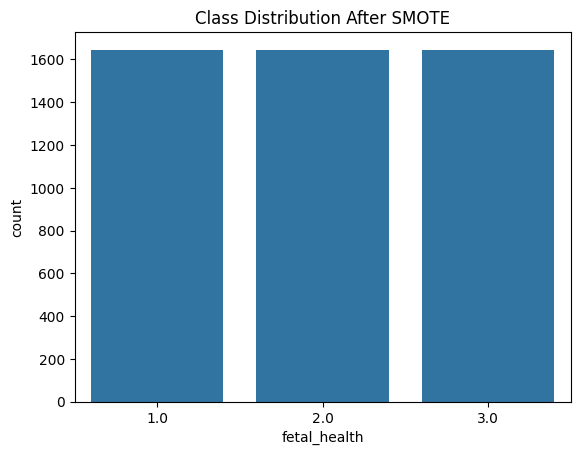

Logistic Regression - Train Accuracy: 88.89%, Test Accuracy: 88.56%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.89      0.92       329
         2.0       0.82      0.87      0.84       329
         3.0       0.88      0.90      0.89       330

    accuracy                           0.89       988
   macro avg       0.89      0.89      0.89       988
weighted avg       0.89      0.89      0.89       988



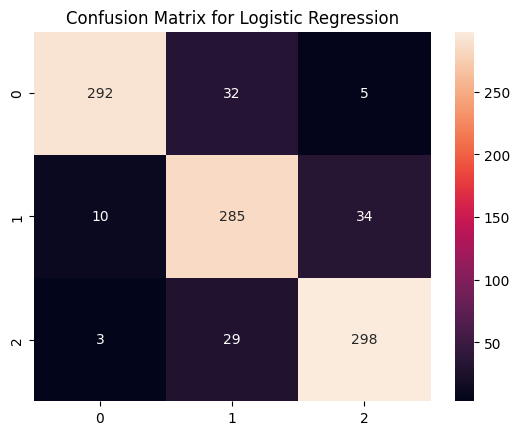

Random Forest - Train Accuracy: 98.68%, Test Accuracy: 97.17%

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       329
         2.0       0.95      0.97      0.96       329
         3.0       0.99      0.99      0.99       330

    accuracy                           0.97       988
   macro avg       0.97      0.97      0.97       988
weighted avg       0.97      0.97      0.97       988



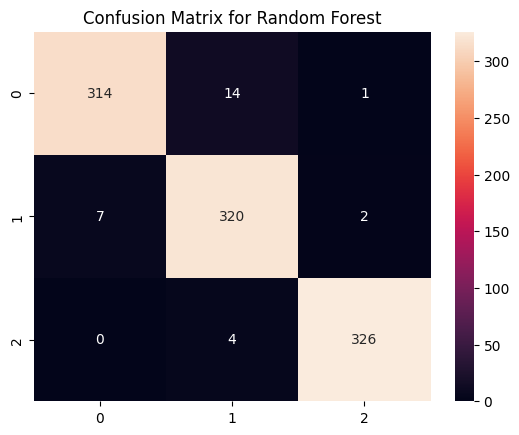

KNN - Train Accuracy: 96.96%, Test Accuracy: 95.14%

KNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.89      0.93       329
         2.0       0.89      0.98      0.93       329
         3.0       0.98      0.99      0.99       330

    accuracy                           0.95       988
   macro avg       0.95      0.95      0.95       988
weighted avg       0.95      0.95      0.95       988



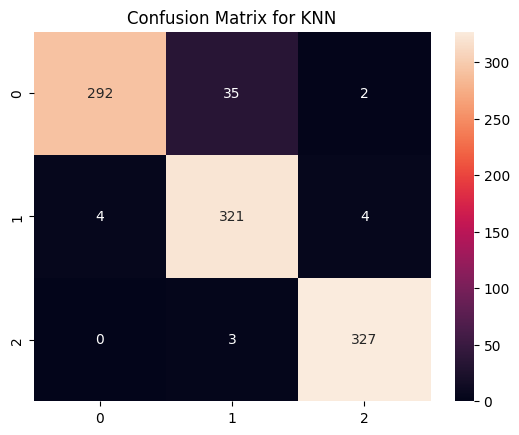

Gradient Boosting - Train Accuracy: 99.52%, Test Accuracy: 97.98%

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       329
         2.0       0.97      0.98      0.97       329
         3.0       1.00      0.98      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988



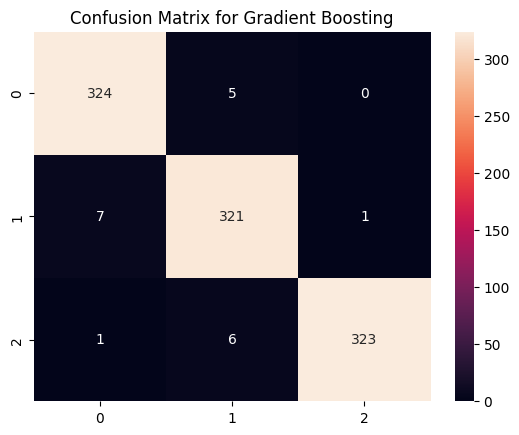


Ensemble Model - Train Accuracy: 98.58%, Test Accuracy: 97.77%

Ensemble Model Report:
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      1.00       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988


Ensemble Model with Adjusted Weights Report:
               precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988

New Data Shape: (1, 21), Expected Shape: 21
New Data Prediction: class 1.0 , Normal
New Data Predictio

  0%|          | 0/1 [00:00<?, ?it/s]


Feature contributions for the predicted class:
baseline value: -0.0067
accelerations: 0.0080
fetal_movement: -0.0013


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import shap  # SHAP library for explainability

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------

# Load dataset (replace 'fetal_health.csv' with your file)
data = pd.read_csv('fetal_health.csv')

# Remove duplicate rows if any
data = data.drop_duplicates()

# Separate features and target
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Check class distribution
print("Class Distribution After SMOTE:\n", y_resampled.value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# Model Initialization & Training
# ---------------------------

# Initialize models
logreg = LogisticRegression(max_iter=5000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)

models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'KNN': knn,
    'Gradient Boosting': gb
}

# Train and evaluate each model individually
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} - Train Accuracy: {train_score * 100:.2f}%, Test Accuracy: {test_score * 100:.2f}%")
    pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# ---------------------------
# Ensemble Models
# ---------------------------

# Voting Classifier (Ensemble Model)
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_model.predict(X_test_scaled)
ensemble_train_accuracy = ensemble_model.score(X_train_scaled, y_train)
ensemble_test_accuracy = ensemble_model.score(X_test_scaled, y_test)
print(f"\nEnsemble Model - Train Accuracy: {ensemble_train_accuracy * 100:.2f}%, Test Accuracy: {ensemble_test_accuracy * 100:.2f}%")
print("\nEnsemble Model Report:\n", classification_report(y_test, ensemble_pred))

# Adjusted weights ensemble
ensemble_weighted_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft', weights=[1, 3, 1, 2])

ensemble_weighted_model.fit(X_train_scaled, y_train)
weighted_pred = ensemble_weighted_model.predict(X_test_scaled)
print("\nEnsemble Model with Adjusted Weights Report:\n", classification_report(y_test, weighted_pred))

# ---------------------------
# New Data Prediction
# ---------------------------

# Example new data point (single instance)
new_data_class_2 = pd.DataFrame({
    'baseline value': [133],
    'accelerations': [0.003],
    'fetal_movement': [0],
    'uterine_contractions': [0.008],
    'light_decelerations': [0.003],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0],
    'abnormal_short_term_variability': [16],
    'mean_value_of_short_term_variability': [2.1],
    'percentage_of_time_with_abnormal_long_term_variability': [0],
    'mean_value_of_long_term_variability': [13.4],
    'histogram_width': [130],
    'histogram_min': [68],
    'histogram_max': [198],
    'histogram_number_of_peaks': [5],
    'histogram_number_of_zeroes': [1],
    'histogram_mode': [141],
    'histogram_mean': [135],
    'histogram_median': [138],
    'histogram_variance': [13],
    'histogram_tendency': [0]
})

print(f"New Data Shape: {new_data_class_2.shape}, Expected Shape: {X_train.shape[1]}")

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_class_2)

# Predict using Ensemble Model
ensemble_predictions = ensemble_model.predict(new_data_scaled)
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class = ensemble_predictions[0]
predicted_class_name = class_labels[predicted_class]
print(f"New Data Prediction: class {predicted_class} , {predicted_class_name}")
print(f"New Data Prediction Probabilities: {ensemble_model.predict_proba(new_data_scaled)[0]}")

# ---------------------------
# SHAP Feature Contribution for Ensemble Prediction
# ---------------------------

# Initialize SHAP JavaScript visualization
shap.initjs()

# Create a KernelExplainer for the ensemble model using a sample of training data
ensemble_explainer = shap.KernelExplainer(ensemble_model.predict_proba, X_train_scaled[:100])

# Get SHAP values for the new data point (this returns a list for multi-class)
ensemble_shap_values = ensemble_explainer.shap_values(new_data_scaled)

# Determine predicted class index (adjust for zero-indexing; assumes class labels are 1,2,3)
predicted_class_index = int(predicted_class - 1)

# In multi-class problems, ensemble_shap_values is a list where each element corresponds to a class.
# Extract SHAP values for the predicted class:
if isinstance(ensemble_shap_values, list) and len(ensemble_shap_values) > 1:
    shap_values_for_class = ensemble_shap_values[predicted_class_index][0]
    base_value = ensemble_explainer.expected_value[predicted_class_index]
else:
    shap_values_for_class = ensemble_shap_values[0][0]
    base_value = ensemble_explainer.expected_value

# Display feature contributions (which features contribute to the predicted class)
print("\nFeature contributions for the predicted class:")
for feature, contribution in zip(X.columns, shap_values_for_class):
    print(f"{feature}: {contribution:.4f}")

# Optionally, display a SHAP force plot for the prediction.
# We use the original (unscaled) new data instance to ensure feature values match their names.
shap.plots.force(base_value, shap_values_for_class, features=new_data_class_2.iloc[0], feature_names=X.columns)

# Optionally, display a summary plot of SHAP values for the new data point.
shap.summary_plot(ensemble_shap_values, new_data_scaled, feature_names=X.columns)


Class Distribution After SMOTE:
 fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64


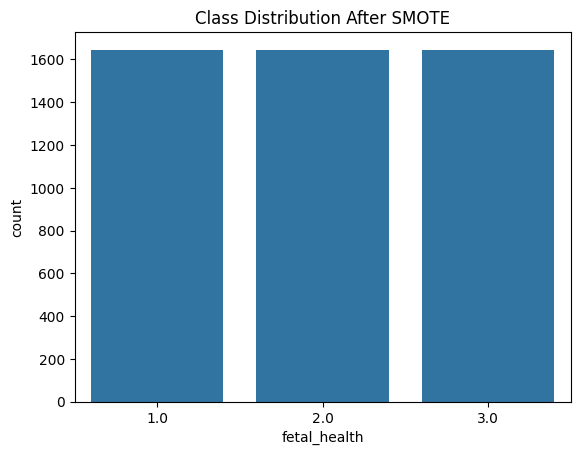

Logistic Regression - Train Accuracy: 88.89%, Test Accuracy: 88.56%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.89      0.92       329
         2.0       0.82      0.87      0.84       329
         3.0       0.88      0.90      0.89       330

    accuracy                           0.89       988
   macro avg       0.89      0.89      0.89       988
weighted avg       0.89      0.89      0.89       988



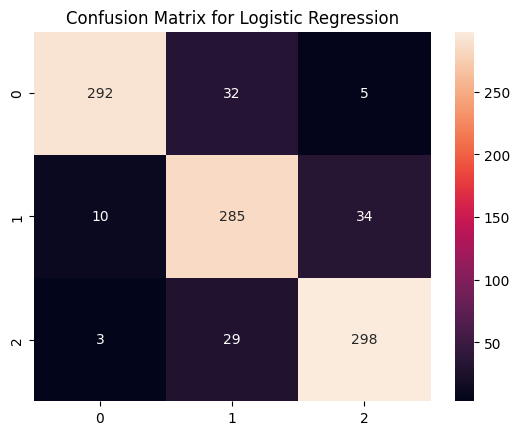

Random Forest - Train Accuracy: 98.68%, Test Accuracy: 97.17%

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       329
         2.0       0.95      0.97      0.96       329
         3.0       0.99      0.99      0.99       330

    accuracy                           0.97       988
   macro avg       0.97      0.97      0.97       988
weighted avg       0.97      0.97      0.97       988



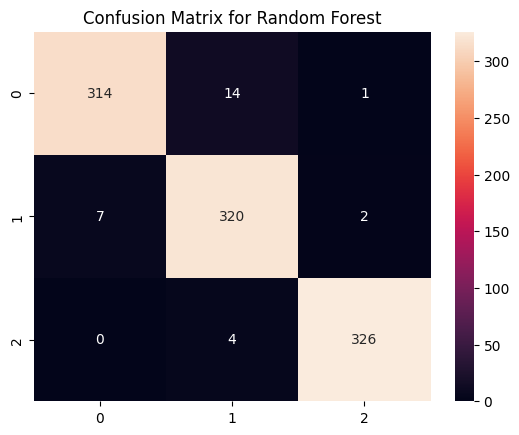

KNN - Train Accuracy: 96.96%, Test Accuracy: 95.14%

KNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.89      0.93       329
         2.0       0.89      0.98      0.93       329
         3.0       0.98      0.99      0.99       330

    accuracy                           0.95       988
   macro avg       0.95      0.95      0.95       988
weighted avg       0.95      0.95      0.95       988



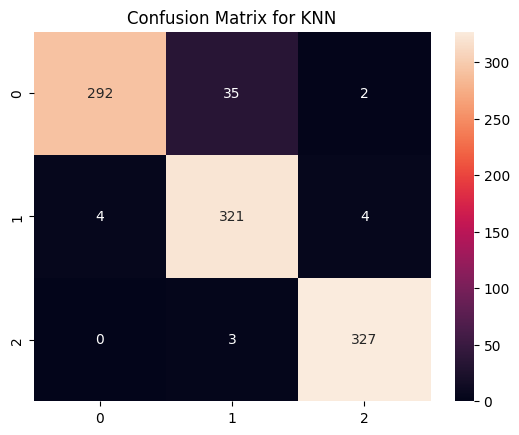

Gradient Boosting - Train Accuracy: 99.52%, Test Accuracy: 97.98%

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       329
         2.0       0.97      0.98      0.97       329
         3.0       1.00      0.98      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988



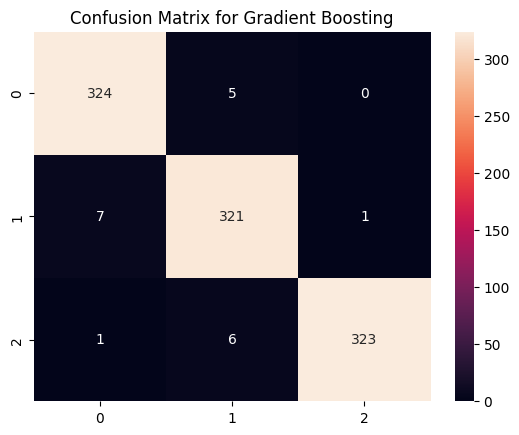


Ensemble Model - Train Accuracy: 98.58%, Test Accuracy: 97.77%

Ensemble Model Report:
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      1.00       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988

New Data Shape: (1, 21), Expected Shape: 21
New Data Prediction: class 2.0 , Suspect
New Data Prediction Probabilities: [0.01482885 0.91816231 0.06700884]


  0%|          | 0/1 [00:00<?, ?it/s]


Feature contributions for the predicted class:
baseline value: 0.0087
accelerations: 0.1111
fetal_movement: -0.1198


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import shap  # SHAP library for explainability

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------

# Load dataset (replace 'fetal_health.csv' with your file)
data = pd.read_csv('fetal_health.csv')

# Remove duplicate rows if any
data = data.drop_duplicates()

# Separate features and target
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Check class distribution
print("Class Distribution After SMOTE:\n", y_resampled.value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# Model Initialization & Training
# ---------------------------

# Initialize models
logreg = LogisticRegression(max_iter=5000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)

models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'KNN': knn,
    'Gradient Boosting': gb
}

# Train and evaluate each model individually
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} - Train Accuracy: {train_score * 100:.2f}%, Test Accuracy: {test_score * 100:.2f}%")
    pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# ---------------------------
# Ensemble Model (Voting Classifier)
# ---------------------------

# Voting Classifier (Ensemble Model) with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_model.predict(X_test_scaled)
ensemble_train_accuracy = ensemble_model.score(X_train_scaled, y_train)
ensemble_test_accuracy = ensemble_model.score(X_test_scaled, y_test)
print(f"\nEnsemble Model - Train Accuracy: {ensemble_train_accuracy * 100:.2f}%, Test Accuracy: {ensemble_test_accuracy * 100:.2f}%")
print("\nEnsemble Model Report:\n", classification_report(y_test, ensemble_pred))

# ---------------------------
# New Data Prediction
# ---------------------------

# Example new data point (single instance)
new_data_class_2 = pd.DataFrame({
    'baseline value': [120],
    'accelerations': [0],
    'fetal_movement': [0],
    'uterine_contractions': [0],
    'light_decelerations': [0],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0],
    'abnormal_short_term_variability': [73],
    'mean_value_of_short_term_variability': [0.5],
    'percentage_of_time_with_abnormal_long_term_variability': [43],
    'mean_value_of_long_term_variability': [2.4],
    'histogram_width': [64],
    'histogram_min': [62],
    'histogram_max': [126],
    'histogram_number_of_peaks': [2],
    'histogram_number_of_zeroes': [0],
    'histogram_mode': [120],
    'histogram_mean': [137],
    'histogram_median': [121],
    'histogram_variance': [73],
    'histogram_tendency': [1]
})

print(f"New Data Shape: {new_data_class_2.shape}, Expected Shape: {X_train.shape[1]}")

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_class_2)

# Predict using Ensemble Model
ensemble_predictions = ensemble_model.predict(new_data_scaled)
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class = ensemble_predictions[0]
predicted_class_name = class_labels[predicted_class]
print(f"New Data Prediction: class {predicted_class} , {predicted_class_name}")
print(f"New Data Prediction Probabilities: {ensemble_model.predict_proba(new_data_scaled)[0]}")

# ---------------------------
# SHAP Feature Contribution for Ensemble Prediction
# ---------------------------

# Initialize SHAP JavaScript visualization
shap.initjs()

# Create a KernelExplainer for the ensemble model using a sample of training data
ensemble_explainer = shap.KernelExplainer(ensemble_model.predict_proba, X_train_scaled[:100])

# Get SHAP values for the new data point (this returns a list for multi-class)
ensemble_shap_values = ensemble_explainer.shap_values(new_data_scaled)

# Determine predicted class index (adjust for zero-indexing; assumes class labels are 1,2,3)
predicted_class_index = int(predicted_class - 1)

# In multi-class problems, ensemble_shap_values is a list where each element corresponds to a class.
# Extract SHAP values for the predicted class:
if isinstance(ensemble_shap_values, list) and len(ensemble_shap_values) > 1:
    shap_values_for_class = ensemble_shap_values[predicted_class_index][0]
    base_value = ensemble_explainer.expected_value[predicted_class_index]
else:
    shap_values_for_class = ensemble_shap_values[0][0]
    base_value = ensemble_explainer.expected_value

# Display feature contributions (which features contribute to the predicted class)
print("\nFeature contributions for the predicted class:")
# Display all feature contributions, including zeros
for feature_name, shap_value in zip(X.columns, shap_values_for_class):
    print(f"{feature_name}: {shap_value:.4f}")


